Data preprocessing :
<br>
Two data sources will be imported <br>
-"AIS_weather_h_rename_copy.csv" will be used to replace the information for true current direction and true wind direction <br>
-The resulting dataframe will be merged with the dataframe from the "AIS_weather_H_ok2_copy.csv" <br>
-The data of the journey between Ronne and Sassnitz will be omitted <br>
-The threshold for the ships manouvering speed will be 5kt (Abebe) <br>

In [183]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
import seaborn as sns
import math
import datetime

dfmain = pd.read_csv("AIS_weather_H_ok2_copy.csv",parse_dates=["Time"])
dfmain = dfmain[dfmain['LAT'] > 55.04 ]

dfpre = pd.read_csv("AIS_weather_h_rename_copy.csv",parse_dates=["Time"])
dfpre = dfpre[dfpre['LAT'] > 55.04 ]

In [184]:
dfpre = dfpre.drop(dfpre.columns[[0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,21,22,23,26]],axis=1)
dfpre = dfpre.rename({'Eastward wind': 'eastwind', 'Northward wind': 'northwind',
                           'Eastward current': 'eastcurrent', 'Northward current': 'northcurrent',
                           'SOG':'sog','COG':'cog','Heading':'heading'},axis=1) 
dfpre.head(n=5)

,eastwind,northwind,eastcurrent,northcurrent,sog,cog
0,2.267688,6.741482,0.113690,0.044994,0.0,358.9
1,1.782681,6.410275,0.113690,0.044994,0.0,358.9
2,1.154659,6.385135,0.083984,0.054000,0.0,358.9
3,0.348801,6.094659,0.083984,0.054000,0.0,358.9
4,-0.593128,6.153186,0.083984,0.054000,0.0,358.9


In [185]:
dfpre["True North Wind Direction"] = np.rad2deg(np.arctan(dfpre["eastwind"]/dfpre["northwind"]))

In [186]:
dfpre["True North Current Direction"] = np.rad2deg(np.arctan(dfpre["eastcurrent"]/dfpre["northcurrent"]))

In [187]:
dfpre = dfpre.drop(['eastwind','northwind','eastcurrent','northcurrent','sog','cog'],axis=1)

In [188]:
df = pd.concat([dfmain,dfpre],axis=1)
df.head()

,Unnamed: 0,Time,LON,LAT,Temperature above oceans,Air density above oceans,Max wave height,Swell period,Wind wave period,Wave period,...,Heading,Wind Speed,Current Speed,True Wind Direction,True Current Direction,True Swell Direction,True Wind Wave Direction,True Wave Direction,True North Wind Direction,True North Current Direction
0,0,2021-01-01 00:00:00,14.689663,55.098452,277.311035,1.259323,1.893614,4.818881,3.818459,4.154329,...,174.0,7.112664,0.122270,155.408180,105.591753,22.854050,22.749664,22.610062,18.591820,68.408246
1,1,2021-01-01 01:00:00,14.689659,55.098451,277.328369,1.259985,1.752303,4.755800,3.470216,4.130580,...,174.0,6.653538,0.122270,158.458891,105.591753,26.122772,19.152008,22.209274,15.541109,68.408246
2,2,2021-01-01 02:00:00,14.689648,55.098468,277.390625,1.260244,1.619775,4.645083,3.259682,4.083755,...,174.0,6.488697,0.099846,163.749663,116.740448,28.498383,12.424912,20.857971,10.250337,57.259552
3,3,2021-01-01 03:00:00,14.689646,55.098471,277.411377,1.260148,1.518736,4.588384,3.177906,4.010502,...,174.0,6.104632,0.099846,170.724504,116.740448,29.956985,6.725922,18.732071,3.275496,57.259552
4,4,2021-01-01 04:00:00,14.689644,55.098462,277.430664,1.260634,1.455034,4.528841,3.281654,3.913362,...,174.0,6.181707,0.099846,179.505940,116.740448,34.486298,3.761627,15.731430,-5.505940,57.259552


In [189]:
# SOG threshold according to Abebe
df = df[df['SOG'] > 5 ]

In [190]:
# Exclude data for the month of June to check the model's forecasting performance 
df = df[df['Time'].dt.strftime('%Y-%m') != '2021-06']
dfdate6 = df[df['Time'].dt.strftime('%Y-%m') == '2021-06']

In [191]:
# Temporary export
# df.to_csv("AIS_sog_threshold.csv")

MAIN SCRIPT

In [192]:
# Master Drop, vary from here 
#df_ship = df.drop(['Unnamed: 0','Time','LON','LAT','Temperature above oceans [K]','Air density above oceans [kg/m^3]','Max wave height [m]',
#'Swell period [deg]','Wind wave period [s]','Wave period [s]','Sea surface temperature [K]','Combined wind waves and swell height [m]','Swell height [m]',
#'Wind wave height [m]','Surface pressure [Pa]','Draught [m]','Width [m]','Length [m]','SOG [knot]','COG [deg]','Heading [deg]','Wind Speed [m/s]','Current Speed [m/s]'
#,'True Wind Direction [deg]','True Current Direction [deg]','True Swell Direction [deg]','True Wind Wave Direction [deg]','True Wave Direction [deg]'],axis=1)
#df_ship.head(n=5)

df_ship = df.drop(['Unnamed: 0','Time','LON','LAT','Air density above oceans',
'Surface pressure','Width','Length'],axis=1)
df_ship.head(n=5)

,Temperature above oceans,Max wave height,Swell period,Wind wave period,Wave period,Sea surface temperature,Combined wind waves and swell height,Swell height,Wind wave height,Draught,...,Heading,Wind Speed,Current Speed,True Wind Direction,True Current Direction,True Swell Direction,True Wind Wave Direction,True Wave Direction,True North Wind Direction,True North Current Direction
8,276.900391,1.661038,4.291309,3.667458,3.757862,279.699585,0.865413,0.323892,0.801956,5.017723,...,269.900574,7.648595,0.104064,91.133175,143.029898,82.454986,91.138748,90.495209,1.033749,52.930471
9,276.705566,1.501637,4.187211,3.145607,3.803910,279.820312,0.785675,0.452440,0.578049,5.019207,...,300.130435,6.700397,0.104050,68.884377,96.351303,134.548587,115.015200,120.971331,9.014812,36.481737
10,276.309815,1.235528,4.012717,2.120399,3.819602,NaN,0.654636,0.556525,0.236435,5.019664,...,230.117302,4.089472,0.092759,129.989203,174.697284,59.296837,47.905998,52.498604,0.106505,44.814586
11,276.399902,1.204397,4.020009,2.090308,3.820546,NaN,0.638782,0.555405,0.226181,5.019009,...,178.653615,3.821501,0.093128,170.879672,107.951765,8.221531,10.314571,1.236454,7.773943,70.701850
12,277.134033,1.275907,4.095175,3.029945,3.815268,279.820312,0.674081,0.598373,0.263031,5.020452,...,125.446296,5.479353,0.086621,102.327505,72.665715,47.977150,68.470208,54.270195,23.118792,52.780582


In [193]:
df_ship2 = df_ship.rename({'Max wave height': 'waveheight', 'Draught': 'draught',
                           'SOG': 'sog', 'Wind Speed': 'windspeed', 
                           'True Wind Direction': 'truewinddir','Temperature above oceans' : 'oceantemperature',
                           'COG': 'cog', 'Current Speed' : 'curspeed','True Wave Direction' : 'truewavedir',
                            'Swell period': 'swellperiod','Wind wave period': 'windwaveperiod','Sea surface temperature': 'surftemp',
                            'Combined wind waves and swell height': 'windwaveswellheight','Swell height': 'swellheight','Wind wave height': 'windwaveheight',
                            'Heading': 'heading','True Current Direction': 'truecurrentdir','True Swell Direction': 'trueswelldir',
                            'True Wind Wave Direction': 'truewindwavedir','Wave period': 'waveperiod',
                            'True North Wind Direction' : 'truenorthwinddir' , 'True North Current Direction' : 'truenorthcurrentdir'
                           }, axis=1) 

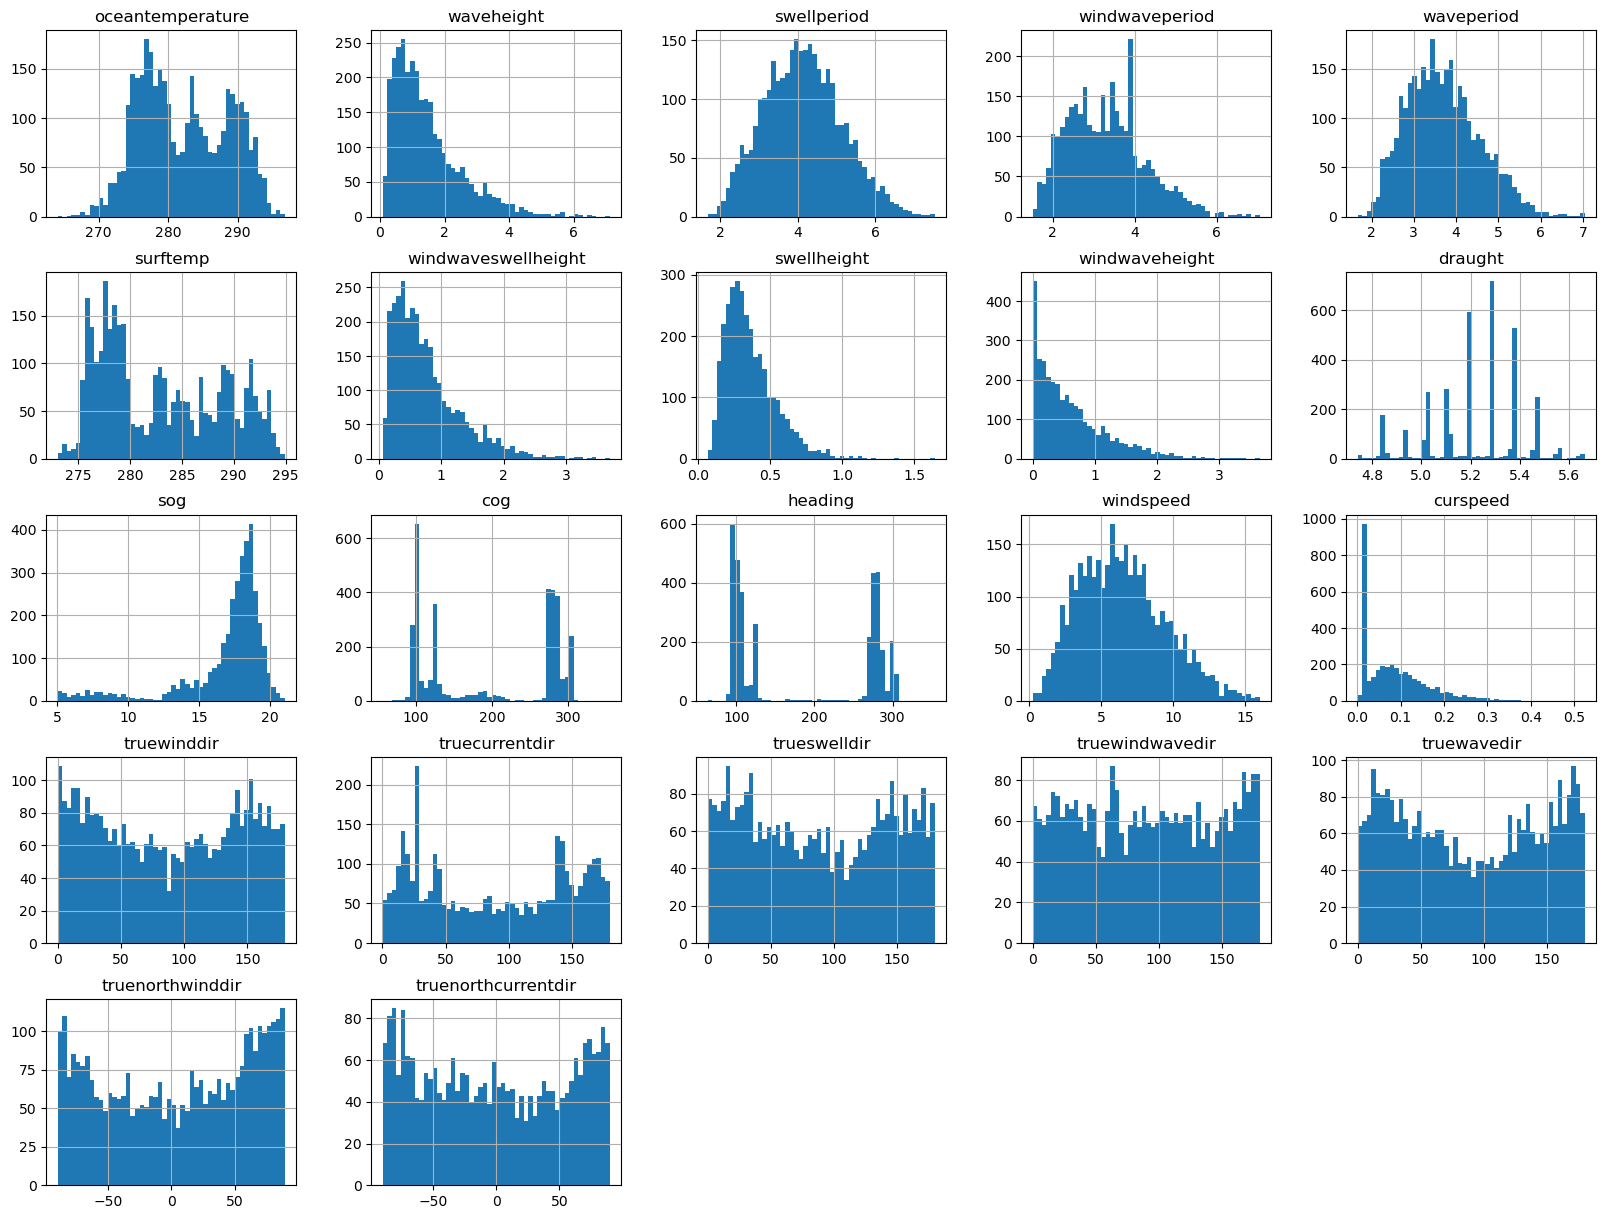

In [194]:
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
df_ship2.hist(bins=50,figsize=(20,15))
plt.show()

In [195]:
corr_matrix = df_ship2.corr()
print(corr_matrix["sog"])

oceantemperature       0.066226
waveheight            -0.004305
swellperiod           -0.001119
windwaveperiod        -0.013876
waveperiod             0.002105
surftemp               0.031413
windwaveswellheight   -0.003199
swellheight           -0.020481
windwaveheight        -0.000675
draught                0.148754
sog                    1.000000
cog                    0.016333
heading                0.213539
windspeed              0.117765
curspeed               0.139609
truewinddir            0.063382
truecurrentdir         0.147950
trueswelldir           0.001415
truewindwavedir       -0.003321
truewavedir           -0.006828
truenorthwinddir       0.011171
truenorthcurrentdir    0.005945
Name: sog, dtype: float64


In [197]:
dfship_corr = df_ship2.drop(df_ship2.columns[[0,5,9,15,16,17,18,19,20,21]],axis=1)
dfship_corr.head()

,waveheight,swellperiod,windwaveperiod,waveperiod,windwaveswellheight,swellheight,windwaveheight,sog,cog,heading,windspeed,curspeed
8,1.661038,4.291309,3.667458,3.757862,0.865413,0.323892,0.801956,14.578394,299.573513,269.900574,7.648595,0.104064
9,1.501637,4.187211,3.145607,3.803910,0.785675,0.452440,0.578049,18.148696,302.274508,300.130435,6.700397,0.104050
10,1.235528,4.012717,2.120399,3.819602,0.654636,0.556525,0.236435,9.686510,163.922318,230.117302,4.089472,0.092759
11,1.204397,4.020009,2.090308,3.820546,0.638782,0.555405,0.226181,11.252112,117.003285,178.653615,3.821501,0.093128
12,1.275907,4.095175,3.029945,3.815268,0.674081,0.598373,0.263031,18.119627,125.829385,125.446296,5.479353,0.086621


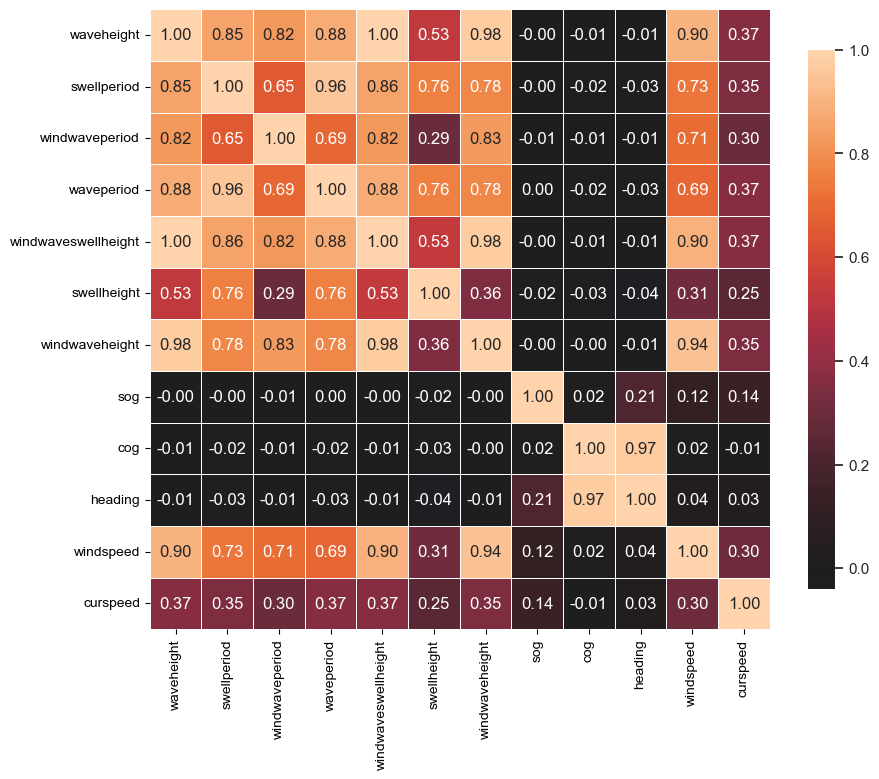

In [198]:
def correlation_heatmap(df,fontsize):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.set(font_scale = fontsize)
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(dfship_corr,1)

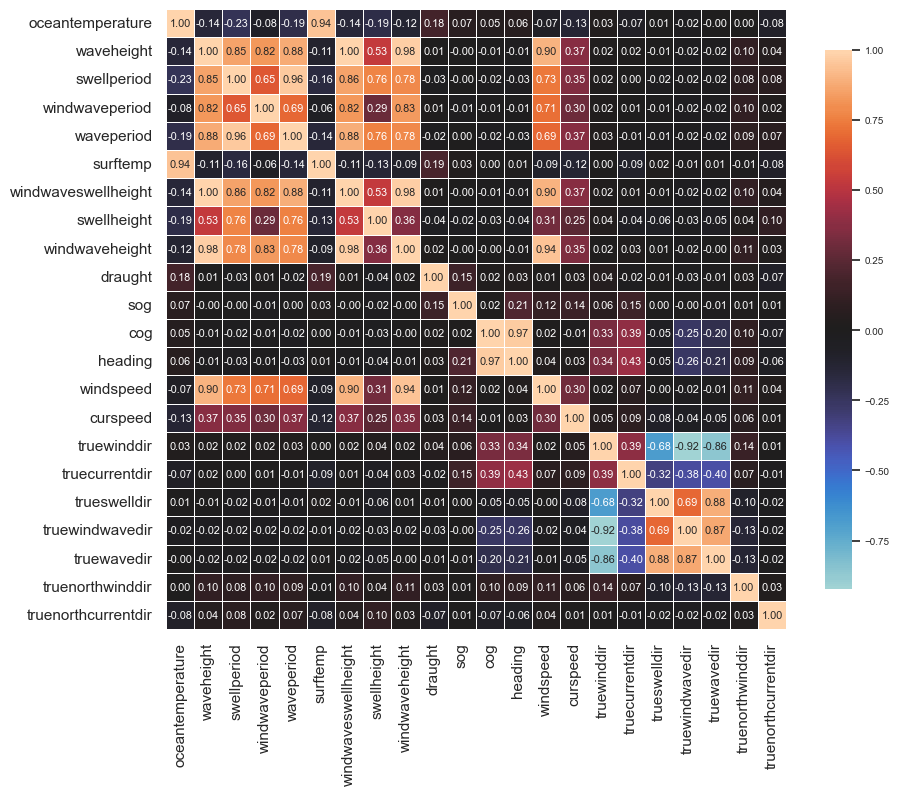

In [199]:
correlation_heatmap(df_ship2,0.65)

In [200]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer()
imputer.fit(df_ship2)

KNNImputer()

In [201]:
X = imputer.transform(df_ship2)

In [202]:
df_ship2tr = pd.DataFrame(X, columns=df_ship2.columns, index=df_ship2.index)

In [203]:
df_ship2tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 8 to 7976
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   oceantemperature     3506 non-null   float64
 1   waveheight           3506 non-null   float64
 2   swellperiod          3506 non-null   float64
 3   windwaveperiod       3506 non-null   float64
 4   waveperiod           3506 non-null   float64
 5   surftemp             3506 non-null   float64
 6   windwaveswellheight  3506 non-null   float64
 7   swellheight          3506 non-null   float64
 8   windwaveheight       3506 non-null   float64
 9   draught              3506 non-null   float64
 10  sog                  3506 non-null   float64
 11  cog                  3506 non-null   float64
 12  heading              3506 non-null   float64
 13  windspeed            3506 non-null   float64
 14  curspeed             3506 non-null   float64
 15  truewinddir          3506 non-null   f

In [204]:
# Implement the Random forest, but first, data is to be split into training and validation data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_ship2tr.drop(['sog'],axis=1),df_ship2tr.sog,test_size=0.2,random_state=42)


In [205]:
x_train

,oceantemperature,waveheight,swellperiod,windwaveperiod,waveperiod,surftemp,windwaveswellheight,swellheight,windwaveheight,draught,...,heading,windspeed,curspeed,truewinddir,truecurrentdir,trueswelldir,truewindwavedir,truewavedir,truenorthwinddir,truenorthcurrentdir
1588,278.394287,2.955442,5.442236,4.254799,4.460406,275.220703,1.539866,0.592407,1.415527e+00,5.289685,...,299.350732,12.863040,0.016704,145.482981,141.645029,118.825494,52.391122,62.762765,84.833713,32.603365
1680,276.154785,1.191841,4.107106,3.057106,4.084279,275.802124,0.632925,0.630059,3.451538e-02,5.199748,...,281.648991,3.767817,0.080787,102.687239,84.936831,51.294224,126.267052,51.392307,24.336230,6.585821
1382,277.038086,1.482997,4.072644,3.474280,3.550550,276.331543,0.774479,0.263230,7.276001e-01,5.166932,...,235.788913,8.278819,0.143133,160.902899,149.405343,48.406766,22.799283,24.476834,74.886014,86.383570
3484,287.922119,0.171486,2.546892,3.864930,2.546831,287.573242,0.100170,0.100113,2.540000e-16,5.533347,...,103.192295,2.829613,0.016704,50.976316,22.196533,13.583278,67.884663,13.587124,-25.831389,22.325583
6351,285.359375,1.187630,3.887300,2.766944,3.485139,285.646362,0.627802,0.473684,3.964233e-01,5.291434,...,99.320800,5.476390,0.145513,115.048590,27.011247,2.828095,50.295319,22.782166,-15.727790,-53.667953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,278.191650,1.721241,5.693275,3.167457,4.829689,278.033814,0.909479,0.701019,5.545197e-01,5.107397,...,95.886229,7.699116,0.104326,114.873768,167.278251,45.407907,70.353521,53.232172,30.759996,83.164479
2505,280.084717,0.837290,4.144559,3.498694,4.140409,278.367310,0.447447,0.447061,8.544922e-03,5.464675,...,279.214826,2.150603,0.038793,65.194368,25.972521,136.574408,114.070403,136.561587,34.020458,-54.812653
2871,278.507080,1.158219,4.308670,2.895667,3.654129,279.403442,0.619633,0.445920,4.240723e-01,5.565977,...,95.288828,5.750585,0.016704,8.496827,14.293067,166.365591,172.479330,169.424489,86.792001,-9.916189
1884,277.278076,1.336331,3.907455,3.283852,3.367172,276.715820,0.701563,0.255432,6.533203e-01,5.472660,...,106.065384,7.502309,0.095568,30.324196,28.341465,135.902115,148.243317,147.082504,75.741188,77.723919


In [206]:
y_train

1588    15.473275
1680    17.885647
1382     9.937532
3484    19.700496
6351    18.800362
          ...    
2419    18.893287
2505    19.434993
2871    20.408992
1884    13.665237
7257    17.884430
Name: sog, Length: 2804, dtype: float64

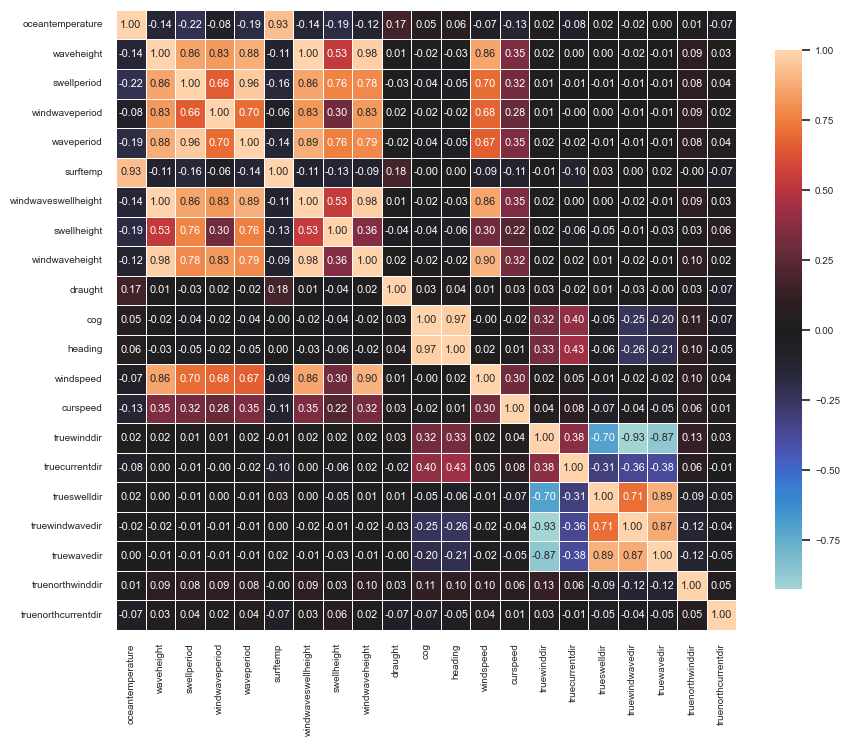

In [207]:
correlation_heatmap(x_train,0.65)

In [208]:
len(x_train)


2804

In [209]:
len(x_test)

702

In [210]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [211]:
from sklearn import tree

fn=x_train.columns

#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=800)
#tree.plot_tree(model.estimators_[0],
#               fontsize=5,
#               max_depth=3,
#               feature_names = fn, 
#               filled = True);
fig, axes = plt.subplots(figsize = (25,5), dpi=800)
#figsize(width,height)
#plt.figure(figsize=(18,4.8))
tree.plot_tree(model.estimators_[0],
               max_depth=3,
               fontsize=8,
               feature_names = fn);
plt.show()

#fig.savefig('rf_individualtree.png')

In [212]:
mod_imp = model.feature_importances_
df_mod_imp = pd.DataFrame(mod_imp,index= x_train.columns,columns=["Importance"])
print(df_mod_imp)

                     Importance
oceantemperature       0.004265
waveheight             0.002166
swellperiod            0.003063
windwaveperiod         0.004908
waveperiod             0.002452
surftemp               0.004715
windwaveswellheight    0.001805
swellheight            0.004199
windwaveheight         0.002708
draught                0.020610
cog                    0.448589
heading                0.461682
windspeed              0.003045
curspeed               0.008506
truewinddir            0.002810
truecurrentdir         0.005149
trueswelldir           0.004789
truewindwavedir        0.002885
truewavedir            0.003376
truenorthwinddir       0.004179
truenorthcurrentdir    0.004098


In [213]:
#from sklearn.feature_selection import RFECV
#selector = RFECV(estimator=RandomForestRegressor(), min_features_to_select=15)
#selector.fit(x_train,y_train)

#dfrank = pd.DataFrame(selector.support_,index=x_train.columns,columns=["Include"])
#dfrank["Rank"] = pd.DataFrame(selector.ranking_,index=x_train.columns)
#print(dfrank)

# This is already functioning 
#from sklearn.feature_selection import RFE
#rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=15)
#rfe.fit(x_train,y_train)

#dfrank = pd.DataFrame(rfe.support_,index=x_train.columns,columns=["Include"])
#dfrank["Rank"] = pd.DataFrame(rfe.ranking_,index=x_train.columns)
#print(dfrank)

#for i in range(x_train.shape[1]):
# print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

In [214]:
model.score(x_test,y_test)
# r^2 score

0.933067637255847

In [215]:
y_predicted = model.predict(x_test)

In [216]:
# Application for evaluation metrics, starting with explained variance

from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,y_predicted)
# Best value is 1 

0.9331839997670441

In [217]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_predicted)
# Best value is 0

0.556922306107963

In [218]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predicted)
# Best value is 0

0.706913043461828

In [219]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test,y_predicted)
# Best value is 0

0.3947650693

Parameter optimization using GridSearchCV

In [220]:
#from sklearn.model_selection import GridSearchCV

#param_grid = [
#    {'n_estimators': [1,100,200], 'min_samples_split': [2,10,20]},
#  ]

#forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
#grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
#                           scoring='neg_mean_squared_error',
#                           return_train_score=True)
#grid_search.fit(x_train, y_train)

In [221]:
#grid_search.best_params_

In [222]:
#grid_search.best_estimator_

In [223]:
#y_pred_grid = grid_search.predict(x_test)

In [224]:
# Application for evaluation metrics, starting with explained variance

#from sklearn.metrics import explained_variance_score
#explained_variance_score(y_test,y_pred_grid)
# Best value is 1 

In [225]:
#from sklearn.metrics import mean_absolute_error
#mean_absolute_error(y_test,y_pred_grid)
# Best value is 0

In [226]:
#from sklearn.metrics import mean_squared_error
#mean_squared_error(y_test,y_pred_grid)
# Best value is 0

In [227]:
#from sklearn.metrics import median_absolute_error
#median_absolute_error(y_test,y_pred_grid)
# Best value is 0

Forecasting for June 2021

In [228]:
df.head()

,Unnamed: 0,Time,LON,LAT,Temperature above oceans,Air density above oceans,Max wave height,Swell period,Wind wave period,Wave period,...,Heading,Wind Speed,Current Speed,True Wind Direction,True Current Direction,True Swell Direction,True Wind Wave Direction,True Wave Direction,True North Wind Direction,True North Current Direction
8,8,2021-01-01 08:00:00,14.559275,55.121629,276.900391,1.261916,1.661038,4.291309,3.667458,3.757862,...,269.900574,7.648595,0.104064,91.133175,143.029898,82.454986,91.138748,90.495209,1.033749,52.930471
9,9,2021-01-01 09:00:00,14.150896,55.261799,276.705566,1.262235,1.501637,4.187211,3.145607,3.803910,...,300.130435,6.700397,0.104050,68.884377,96.351303,134.548587,115.015200,120.971331,9.014812,36.481737
10,10,2021-01-01 10:00:00,13.837859,55.396479,276.309815,1.256282,1.235528,4.012717,2.120399,3.819602,...,230.117302,4.089472,0.092759,129.989203,174.697284,59.296837,47.905998,52.498604,0.106505,44.814586
11,11,2021-01-01 11:00:00,13.850090,55.390485,276.399902,1.256545,1.204397,4.020009,2.090308,3.820546,...,178.653615,3.821501,0.093128,170.879672,107.951765,8.221531,10.314571,1.236454,7.773943,70.701850
12,12,2021-01-01 12:00:00,14.155408,55.255379,277.134033,1.262830,1.275907,4.095175,3.029945,3.815268,...,125.446296,5.479353,0.086621,102.327505,72.665715,47.977150,68.470208,54.270195,23.118792,52.780582


In [229]:
dfdate = pd.read_csv("AIS_weather_H_ok2_copy.csv",parse_dates=["Time"])
dfdate = dfdate[dfdate['LAT'] > 55.04 ]

In [230]:
dfdate.head()

,Unnamed: 0,Time,LON,LAT,Temperature above oceans,Air density above oceans,Max wave height,Swell period,Wind wave period,Wave period,...,SOG,COG,Heading,Wind Speed,Current Speed,True Wind Direction,True Current Direction,True Swell Direction,True Wind Wave Direction,True Wave Direction
0,0,2021-01-01 00:00:00,14.689663,55.098452,277.311035,1.259323,1.893614,4.818881,3.818459,4.154329,...,0.0,358.9,174.0,7.112664,0.122270,155.408180,105.591753,22.854050,22.749664,22.610062
1,1,2021-01-01 01:00:00,14.689659,55.098451,277.328369,1.259985,1.752303,4.755800,3.470216,4.130580,...,0.0,358.9,174.0,6.653538,0.122270,158.458891,105.591753,26.122772,19.152008,22.209274
2,2,2021-01-01 02:00:00,14.689648,55.098468,277.390625,1.260244,1.619775,4.645083,3.259682,4.083755,...,0.0,358.9,174.0,6.488697,0.099846,163.749663,116.740448,28.498383,12.424912,20.857971
3,3,2021-01-01 03:00:00,14.689646,55.098471,277.411377,1.260148,1.518736,4.588384,3.177906,4.010502,...,0.0,358.9,174.0,6.104632,0.099846,170.724504,116.740448,29.956985,6.725922,18.732071
4,4,2021-01-01 04:00:00,14.689644,55.098462,277.430664,1.260634,1.455034,4.528841,3.281654,3.913362,...,0.0,358.9,174.0,6.181707,0.099846,179.505940,116.740448,34.486298,3.761627,15.731430


In [231]:
haha

NameError: name 'haha' is not defined

In [ ]:
dfdate["stw"] = dfship_pre["stw"]
dfdate["northcurrdir"] = dfship_pre["curdir"]
dfdate["nortwinddir"] = dfship_pre["winddir"]

dfdate.head(n=10)

NameError: name 'dfship_pre' is not defined

In [ ]:
dfdate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453 entries, 0 to 7995
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Unnamed: 0                            7453 non-null   int64         
 1   Time                                  7453 non-null   datetime64[ns]
 2   LON                                   7453 non-null   float64       
 3   LAT                                   7453 non-null   float64       
 4   Temperature above oceans              7453 non-null   float64       
 5   Air density above oceans              7337 non-null   float64       
 6   Max wave height                       6274 non-null   float64       
 7   Swell period                          6274 non-null   float64       
 8   Wind wave period                      6274 non-null   float64       
 9   Wave period                           6274 non-null   float64       
 10  

In [ ]:
# Filter Rows by Dates in pandas DataFrame
dfdate2 = dfdate[(dfdate['Time'] > "2021-05-31") & (dfdate['Time']< "2021-07-01")]
print(dfdate2)
#dfdate2.to_csv("June_AIS_H_ok2.csv")


      Unnamed: 0                Time        LON        LAT  \
119          119 2021-06-01 00:00:00  12.963169  55.245259   
120          120 2021-06-01 01:00:00  13.553184  55.190532   
121          121 2021-06-01 02:00:00  14.073991  55.143902   
122          122 2021-06-01 03:00:00  14.564450  55.096648   
123          123 2021-06-01 04:00:00  14.689651  55.098452   
...          ...                 ...        ...        ...   
7415        7415 2021-06-12 19:00:00  12.462626  55.399230   
7416        7416 2021-06-12 20:00:00  12.204991  55.456366   
7417        7417 2021-06-12 21:00:00  12.196962  55.455570   
7418        7418 2021-06-12 22:00:00  12.262350  55.448184   
7419        7419 2021-06-12 23:00:00  12.590485  55.331675   

      Temperature above oceans  Air density above oceans  Max wave height  \
119                 275.823975                  1.283481         3.358080   
120                 275.924011                  1.283425         3.578120   
121                 276.

In [ ]:
dfchk6_sog= dfdate2[dfdate2["SOG"] > dfdate2["stw"] ]
dfchk6_stw= dfdate2[dfdate2["stw"] > dfdate2["SOG"] ]
#dfchk6_sog.to_csv("June_AIS_H_ok2sog.csv")
#dfchk6_stw.to_csv("June_AIS_H_ok2stw.csv")
print(dfchk6_sog.info())
print(dfchk6_stw.info())

dfdate2 = dfdate2.drop(['Unnamed: 0','Time','LON','LAT','Air density above oceans',
'Surface pressure','Width','Length'],axis=1)
dfdate2.head(n=5)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 119 to 7416
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Unnamed: 0                            188 non-null    int64         
 1   Time                                  188 non-null    datetime64[ns]
 2   LON                                   188 non-null    float64       
 3   LAT                                   188 non-null    float64       
 4   Temperature above oceans              188 non-null    float64       
 5   Air density above oceans              176 non-null    float64       
 6   Max wave height                       153 non-null    float64       
 7   Swell period                          153 non-null    float64       
 8   Wind wave period                      153 non-null    float64       
 9   Wave period                           153 non-null    float64       
 10 

,Temperature above oceans,Max wave height,Swell period,Wind wave period,Wave period,Sea surface temperature,Combined wind waves and swell height,Swell height,Wind wave height,Draught,...,Wind Speed,Current Speed,True Wind Direction,True Current Direction,True Swell Direction,True Wind Wave Direction,True Wave Direction,stw,northcurrdir,nortwinddir
119,275.823975,3.358080,6.738089,4.925452,5.291555,278.661621,1.759765,0.743164,1.583740,5.281861,...,10.248966,0.144914,100.989288,164.871808,15.554049,66.843493,57.268527,18.729972,85.654121,21.771601
120,275.924011,3.578120,7.185143,5.342444,5.697814,278.936035,1.950242,0.841925,1.757568,5.289403,...,11.364678,0.246220,108.737155,153.650411,11.071672,60.455881,51.313932,18.913459,70.585227,25.671971
121,276.285034,4.184914,7.260825,5.460486,6.126474,279.209961,2.189788,0.933936,1.910706,5.288446,...,12.666946,0.284315,114.910729,153.031589,16.281358,57.086511,46.894106,18.429833,70.557348,32.436488
122,277.189484,4.908680,6.808745,6.225745,6.284671,279.216553,2.565230,0.723303,2.452637,5.290781,...,13.386999,0.300428,123.568984,153.643227,69.175152,55.507286,56.527939,13.276732,80.584748,50.510505
123,277.396118,4.986748,6.815893,6.302772,6.418481,279.319824,2.601852,0.856281,2.433167,5.013024,...,13.105545,0.300428,66.872260,86.851414,145.135853,115.342209,118.364872,0.583972,80.584748,60.605594


In [ ]:
dfdate2 = dfdate2.rename({'Max wave height': 'waveheight', 'Draught': 'draught',
                           'SOG': 'sog', 'Wind Speed': 'windspeed', 
                           'True Wind Direction': 'truewinddir','Temperature above oceans' : 'oceantemperature',
                           'COG': 'cog', 'Current Speed' : 'curspeed','True Wave Direction' : 'truewavedir',
                            'Swell period': 'swellperiod','Wind wave period': 'windwaveperiod','Sea surface temperature': 'surftemp',
                            'Combined wind waves and swell height': 'windwaveswellheight','Swell height': 'swellheight','Wind wave height': 'windwaveheight',
                            'Heading': 'heading','True Current Direction': 'truecurrentdir','True Swell Direction': 'trueswelldir',
                            'True Wind Wave Direction': 'truewindwavedir','Wave period': 'waveperiod'
                           }, axis=1) 

In [ ]:
imputer.fit(dfdate2)

KNNImputer()

In [ ]:
xdate = imputer.transform(dfdate2)

In [ ]:
dfdate2tr = pd.DataFrame(xdate, columns=dfdate2.columns, index=dfdate2.index)

In [ ]:
dfdate2tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 119 to 7419
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   oceantemperature     639 non-null    float64
 1   waveheight           639 non-null    float64
 2   swellperiod          639 non-null    float64
 3   windwaveperiod       639 non-null    float64
 4   waveperiod           639 non-null    float64
 5   surftemp             639 non-null    float64
 6   windwaveswellheight  639 non-null    float64
 7   swellheight          639 non-null    float64
 8   windwaveheight       639 non-null    float64
 9   draught              639 non-null    float64
 10  sog                  639 non-null    float64
 11  cog                  639 non-null    float64
 12  heading              639 non-null    float64
 13  windspeed            639 non-null    float64
 14  curspeed             639 non-null    float64
 15  truewinddir          639 non-null    

In [ ]:
x_date = dfdate2tr.drop(['sog','stw'],axis=1)
y_date = dfdate2tr.sog
x_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 119 to 7419
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   oceantemperature     639 non-null    float64
 1   waveheight           639 non-null    float64
 2   swellperiod          639 non-null    float64
 3   windwaveperiod       639 non-null    float64
 4   waveperiod           639 non-null    float64
 5   surftemp             639 non-null    float64
 6   windwaveswellheight  639 non-null    float64
 7   swellheight          639 non-null    float64
 8   windwaveheight       639 non-null    float64
 9   draught              639 non-null    float64
 10  cog                  639 non-null    float64
 11  heading              639 non-null    float64
 12  windspeed            639 non-null    float64
 13  curspeed             639 non-null    float64
 14  truewinddir          639 non-null    float64
 15  truecurrentdir       639 non-null    

In [ ]:
model.fit(x_date,y_date)

RandomForestRegressor()

In [ ]:
model.score(x_date,y_date)

0.9977307958278714

In [ ]:
ydate_pred = model.predict(x_date)

In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_date,ydate_pred)

0.997730913008806

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_date,ydate_pred)

0.18528465893392743

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_date,ydate_pred)

0.1785996095592558

In [ ]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_date,ydate_pred)

0.059157182169999996

In [ ]:
dfprog_sog = pd.Series(y_date,name="sog_act").to_frame()
dfprog_sog["sog_pred"] = ydate_pred
print(dfprog_sog)

        sog_act   sog_pred
119   18.998906  18.967811
120   19.334278  19.088384
121   18.911047  18.794636
122   13.854933  13.388635
123    0.000000   0.140657
...         ...        ...
7415  15.963630  16.738929
7416   3.085459   3.511827
7417   0.000000   0.110035
7418   8.988086   9.072792
7419  17.672769  17.489645

[639 rows x 2 columns]


In [ ]:
dfprog = pd.concat([x_date,dfprog_sog],axis=1)
dfprog.head(n=10)

,oceantemperature,waveheight,swellperiod,windwaveperiod,waveperiod,surftemp,windwaveswellheight,swellheight,windwaveheight,draught,...,curspeed,truewinddir,truecurrentdir,trueswelldir,truewindwavedir,truewavedir,northcurrdir,nortwinddir,sog_act,sog_pred
119,275.823975,3.358080,6.738089,4.925452,5.291555,278.661621,1.759765,0.743164,1.583740,5.281861,...,0.144914,100.989288,164.871808,15.554049,66.843493,57.268527,85.654121,21.771601,18.998906,18.967811
120,275.924011,3.578120,7.185143,5.342444,5.697814,278.936035,1.950242,0.841925,1.757568,5.289403,...,0.246220,108.737155,153.650411,11.071672,60.455881,51.313932,70.585227,25.671971,19.334278,19.088384
121,276.285034,4.184914,7.260825,5.460486,6.126474,279.209961,2.189788,0.933936,1.910706,5.288446,...,0.284315,114.910729,153.031589,16.281358,57.086511,46.894106,70.557348,32.436488,18.911047,18.794636
122,277.189484,4.908680,6.808745,6.225745,6.284671,279.216553,2.565230,0.723303,2.452637,5.290781,...,0.300428,123.568984,153.643227,69.175152,55.507286,56.527939,80.584748,50.510505,13.854933,13.388635
123,277.396118,4.986748,6.815893,6.302772,6.418481,279.319824,2.601852,0.856281,2.433167,5.013024,...,0.300428,66.872260,86.851414,145.135853,115.342209,118.364872,80.584748,60.605594,0.000000,0.140657
124,277.655945,4.882606,6.781960,6.225257,6.385939,279.319824,2.548358,0.877191,2.355652,4.920497,...,0.262897,69.199755,95.792423,142.136679,112.624105,116.557745,89.447596,62.854928,0.000000,0.016459
125,277.667755,4.786871,6.696195,6.121009,6.340137,279.319824,2.495529,0.906226,2.275208,4.933332,...,0.262897,72.772267,95.447596,145.841980,109.999123,115.341347,89.447596,66.772267,0.000000,0.016459
126,277.408752,4.621826,6.813305,5.970984,6.291378,279.319824,2.414834,1.022894,2.130981,4.842367,...,0.262897,26.476633,41.766758,158.632374,159.050718,167.192888,89.447596,74.157471,9.305198,11.288800
127,277.399658,3.852527,6.907508,5.299354,6.061778,279.230591,2.021695,1.143225,1.607422,4.841530,...,0.181460,49.650197,36.203894,98.603207,126.285782,119.939682,85.735437,72.289134,20.935741,19.202839
128,275.499359,3.304548,6.816074,4.561194,5.927387,284.331543,1.754722,1.136414,1.240662,4.852890,...,0.281402,11.124505,16.745666,170.252415,173.337517,176.253205,87.870444,60.000273,12.419853,13.579055


In [ ]:
dfprog["vgms"] = dfprog["sog_pred"]/1.9438

In [ ]:
dfprog["vgx"] = dfprog["vgms"] * np.sin(np.deg2rad(dfprog["cog"]))
dfprog["vcx"] = dfprog["curspeed"] * np.sin(np.deg2rad(dfprog["northcurrdir"]))
dfprog["stw_x"] = (dfprog["vgx"] - dfprog["vcx"])

In [ ]:
dfprog["vgy"] = dfprog["vgms"] * np.cos(np.deg2rad(dfprog["cog"]))
dfprog["vcy"] = dfprog["curspeed"] * np.cos(np.deg2rad(dfprog["northcurrdir"]))
dfprog["stw_y"] = (dfprog["vgy"] - dfprog["vcy"])

In [ ]:
dfprog["vwms_p"] = np.sqrt(dfprog["stw_x"]**2 + dfprog["stw_y"]**2)
dfprog["stw_pred"] = dfprog["vwms_p"]*1.9438
dfprog = dfprog.drop(['vgms','vgx','vcx','stw_x',
                      'vgy','vcy','stw_y',
                      'vwms_p'],axis=1)
#df_ship.head(n=5)
dfprog.head(n=10)

,oceantemperature,waveheight,swellperiod,windwaveperiod,waveperiod,surftemp,windwaveswellheight,swellheight,windwaveheight,draught,...,truewinddir,truecurrentdir,trueswelldir,truewindwavedir,truewavedir,northcurrdir,nortwinddir,sog_act,sog_pred,stw_pred
119,275.823975,3.358080,6.738089,4.925452,5.291555,278.661621,1.759765,0.743164,1.583740,5.281861,...,100.989288,164.871808,15.554049,66.843493,57.268527,85.654121,21.771601,18.998906,18.967811,18.698878
120,275.924011,3.578120,7.185143,5.342444,5.697814,278.936035,1.950242,0.841925,1.757568,5.289403,...,108.737155,153.650411,11.071672,60.455881,51.313932,70.585227,25.671971,19.334278,19.088384,18.667582
121,276.285034,4.184914,7.260825,5.460486,6.126474,279.209961,2.189788,0.933936,1.910706,5.288446,...,114.910729,153.031589,16.281358,57.086511,46.894106,70.557348,32.436488,18.911047,18.794636,18.313435
122,277.189484,4.908680,6.808745,6.225745,6.284671,279.216553,2.565230,0.723303,2.452637,5.290781,...,123.568984,153.643227,69.175152,55.507286,56.527939,80.584748,50.510505,13.854933,13.388635,12.810443
123,277.396118,4.986748,6.815893,6.302772,6.418481,279.319824,2.601852,0.856281,2.433167,5.013024,...,66.872260,86.851414,145.135853,115.342209,118.364872,80.584748,60.605594,0.000000,0.140657,0.573950
124,277.655945,4.882606,6.781960,6.225257,6.385939,279.319824,2.548358,0.877191,2.355652,4.920497,...,69.199755,95.792423,142.136679,112.624105,116.557745,89.447596,62.854928,0.000000,0.016459,0.510666
125,277.667755,4.786871,6.696195,6.121009,6.340137,279.319824,2.495529,0.906226,2.275208,4.933332,...,72.772267,95.447596,145.841980,109.999123,115.341347,89.447596,66.772267,0.000000,0.016459,0.510666
126,277.408752,4.621826,6.813305,5.970984,6.291378,279.319824,2.414834,1.022894,2.130981,4.842367,...,26.476633,41.766758,158.632374,159.050718,167.192888,89.447596,74.157471,9.305198,11.288800,10.991689
127,277.399658,3.852527,6.907508,5.299354,6.061778,279.230591,2.021695,1.143225,1.607422,4.841530,...,49.650197,36.203894,98.603207,126.285782,119.939682,85.735437,72.289134,20.935741,19.202839,19.488470
128,275.499359,3.304548,6.816074,4.561194,5.927387,284.331543,1.754722,1.136414,1.240662,4.852890,...,11.124505,16.745666,170.252415,173.337517,176.253205,87.870444,60.000273,12.419853,13.579055,13.912418


January Forecast 

In [ ]:
# Filter Rows by Dates in pandas DataFrame
dfdate1 = dfdate[(dfdate['Time'] >= "2021-01-01") & (dfdate['Time']< "2021-02-01")]
print(dfdate1)

      Unnamed: 0                Time        LON        LAT  \
0              0 2021-01-01 00:00:00  14.689663  55.098452   
1              1 2021-01-01 01:00:00  14.689659  55.098451   
2              2 2021-01-01 02:00:00  14.689648  55.098468   
3              3 2021-01-01 03:00:00  14.689646  55.098471   
4              4 2021-01-01 04:00:00  14.689644  55.098462   
...          ...                 ...        ...        ...   
7322        7322 2021-01-12 19:00:00  12.879489  55.274490   
7323        7323 2021-01-12 20:00:00  12.462587  55.410457   
7324        7324 2021-01-12 21:00:00  12.213636  55.456972   
7325        7325 2021-01-12 22:00:00  12.196956  55.455590   
7326        7326 2021-01-12 23:00:00  12.203460  55.456269   

      Temperature above oceans  Air density above oceans  Max wave height  \
0                   277.311035                  1.259323         1.893614   
1                   277.328369                  1.259985         1.752303   
2                   277.

In [ ]:
dfdate1 = dfdate1.drop(['Unnamed: 0','Time','LON','LAT','Air density above oceans',
                        'Surface pressure','Width','Length'],axis=1)

dfdate1 = dfdate1.rename({'Max wave height': 'waveheight', 'Draught': 'draught',
                           'SOG': 'sog', 'Wind Speed': 'windspeed', 
                           'True Wind Direction': 'truewinddir','Temperature above oceans' : 'oceantemperature',
                           'COG': 'cog', 'Current Speed' : 'curspeed','True Wave Direction' : 'truewavedir',
                            'Swell period': 'swellperiod','Wind wave period': 'windwaveperiod','Sea surface temperature': 'surftemp',
                            'Combined wind waves and swell height': 'windwaveswellheight','Swell height': 'swellheight','Wind wave height': 'windwaveheight',
                            'Heading': 'heading','True Current Direction': 'truecurrentdir','True Swell Direction': 'trueswelldir',
                            'True Wind Wave Direction': 'truewindwavedir','Wave period': 'waveperiod'
                           }, axis=1) 

In [ ]:
imputer.fit(dfdate1)

KNNImputer()

In [ ]:
xdate1 = imputer.transform(dfdate1)

In [ ]:
dfdate1tr = pd.DataFrame(xdate1, columns=dfdate1.columns, index=dfdate1.index)

In [ ]:
dfdate1tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 7326
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   oceantemperature     744 non-null    float64
 1   waveheight           744 non-null    float64
 2   swellperiod          744 non-null    float64
 3   windwaveperiod       744 non-null    float64
 4   waveperiod           744 non-null    float64
 5   surftemp             744 non-null    float64
 6   windwaveswellheight  744 non-null    float64
 7   swellheight          744 non-null    float64
 8   windwaveheight       744 non-null    float64
 9   draught              744 non-null    float64
 10  sog                  744 non-null    float64
 11  cog                  744 non-null    float64
 12  heading              744 non-null    float64
 13  windspeed            744 non-null    float64
 14  curspeed             744 non-null    float64
 15  truewinddir          744 non-null    fl

In [ ]:
x_date1 = dfdate1tr.drop(['sog','stw'],axis=1)
y_date1 = dfdate1tr.sog


In [ ]:
model.fit(x_date1,y_date1)

RandomForestRegressor()

In [ ]:
model.score(x_date1,y_date1)

0.9952481844059393

In [ ]:
ydate_pred1 = model.predict(x_date1)

In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_date1,ydate_pred1)

0.9952495224024079

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_date1,ydate_pred1)

0.2653545012179977

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_date1,ydate_pred1)


0.3409490264591319

In [ ]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_date1,ydate_pred1)

0.06585417299000085

In [ ]:
dfprog1_sog = pd.Series(y_date1,name="sog_act").to_frame()
dfprog1_sog["sog_pred"] = ydate_pred1
print(dfprog1_sog)

        sog_act   sog_pred
0      0.000000   0.000000
1      0.000000   0.000000
2      0.000000   0.000645
3      0.000000   0.000430
4      0.000000  -0.000002
...         ...        ...
7322  18.118929  18.171609
7323  15.624786  16.343093
7324   3.097024   4.749417
7325   0.000000   2.142763
7326   2.255039   3.817182

[744 rows x 2 columns]
